In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats # Many functions for probability distributions in python are in scipy.stats
import os
from scipy.stats import variation 
from scipy.stats import ttest_rel
import statistics as s
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
df = pd.read_csv("Holiday_Package.csv")

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.shape

(872, 8)

#### Independent Variables (IVs) ratio should ideally be 20:1; that is 20 cases for every IV in the model. The lowest your ratio should be is 5:1 (i.e., 5 cases for every IV in the model).


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [6]:
df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [7]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [8]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)


In [9]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [10]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [11]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [12]:
def univariateAnalysis_numeric(column,nbins):
   
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()

In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64',])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

5

Distribution of Salary
----------------------------------------------------------------------------


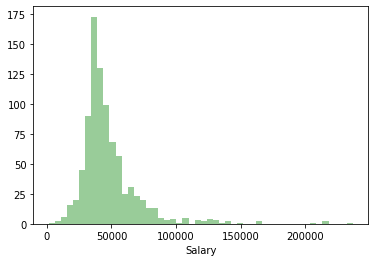

Distribution of age
----------------------------------------------------------------------------


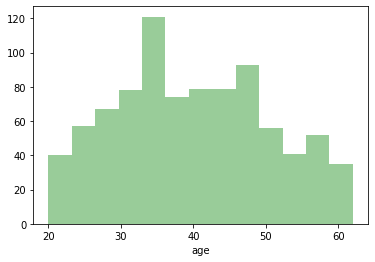

Distribution of educ
----------------------------------------------------------------------------


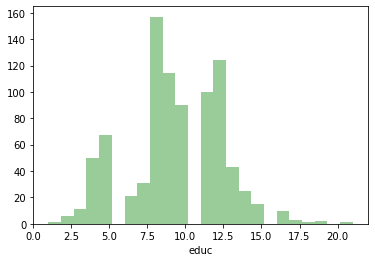

Distribution of no_young_children
----------------------------------------------------------------------------


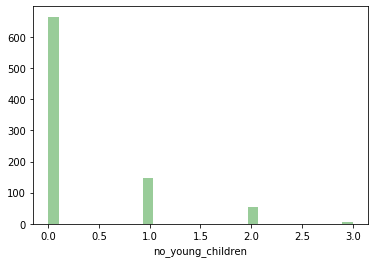

Distribution of no_older_children
----------------------------------------------------------------------------


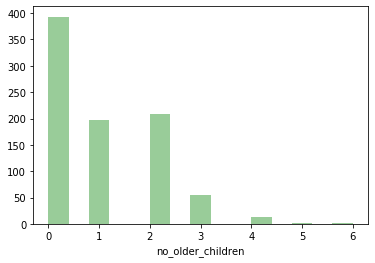

In [14]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [15]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


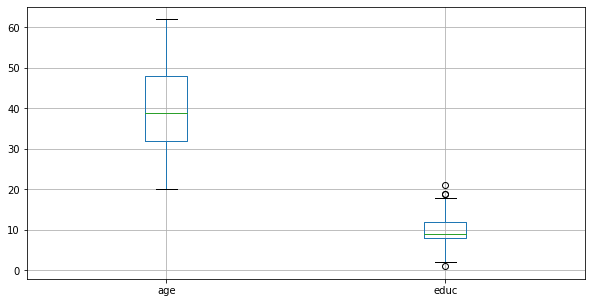

In [16]:
df.boxplot(column=['age', 'educ',  ], figsize=(10,5))

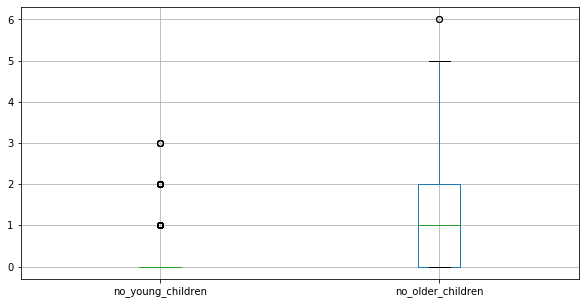

In [17]:
df.boxplot(column=['no_young_children', 'no_older_children',  ], figsize=(10,5))

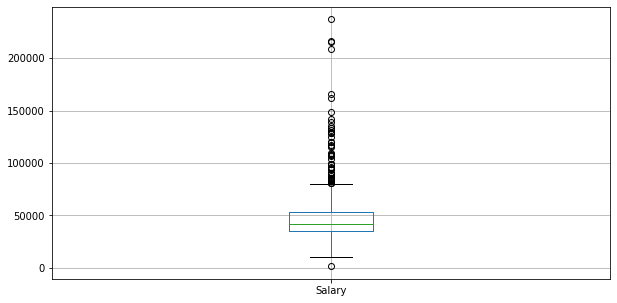

In [18]:
df.boxplot(column=['Salary'], figsize=(10,5))

In [19]:
df = df.drop(df[(df['Salary'] < 2000) ].index)
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


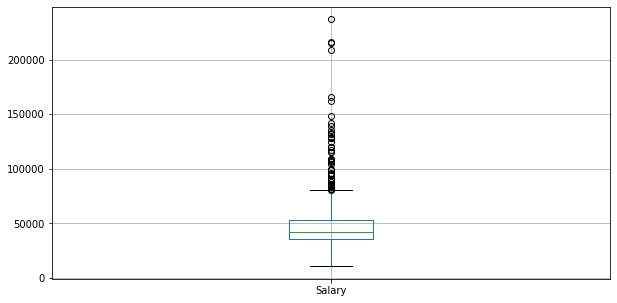

In [20]:
df.boxplot(column=['Salary'], figsize=(10,5))

In [21]:
from outliers import smirnov_grubbs as grubbs
from statistics import variance

In [22]:
print(df.var())


Salary               5.465861e+08
age                  1.111315e+02
educ                 9.221120e+00
no_young_children    3.759294e-01
no_older_children    1.181351e+00
dtype: float64


####  The variance can be useful when you’re using a technique like ANOVA or Regression and you’re trying to explain the total variance in a model due to specific factors. For this the result above we cans ee that after imputing the missing object and removing the abstract outliers our data is more or less evenly spread out.


In [23]:
corr = df_num.corr(method='pearson')

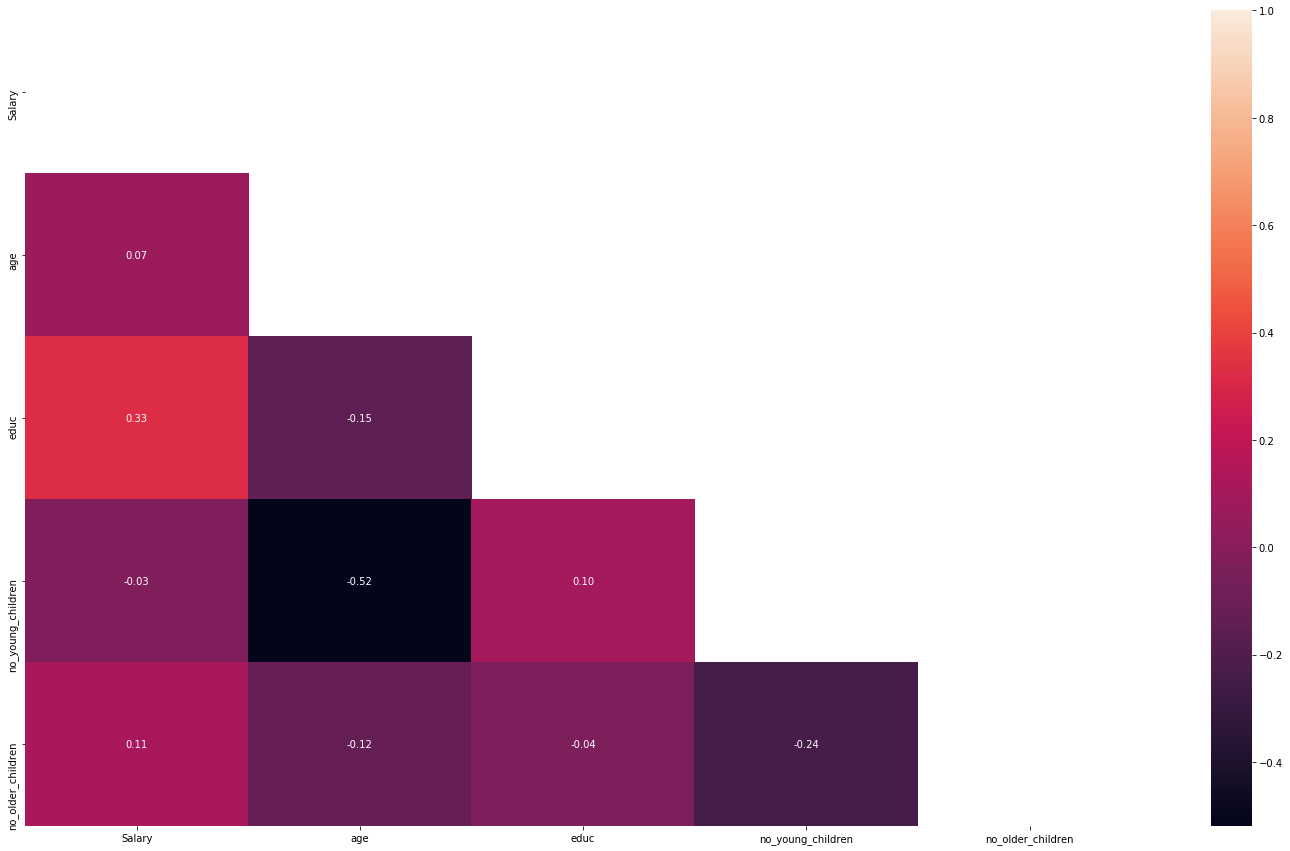

In [24]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Holliday_Package']= label_encoder.fit_transform(df['Holliday_Package'])
df['foreign']= label_encoder.fit_transform(df['foreign'])

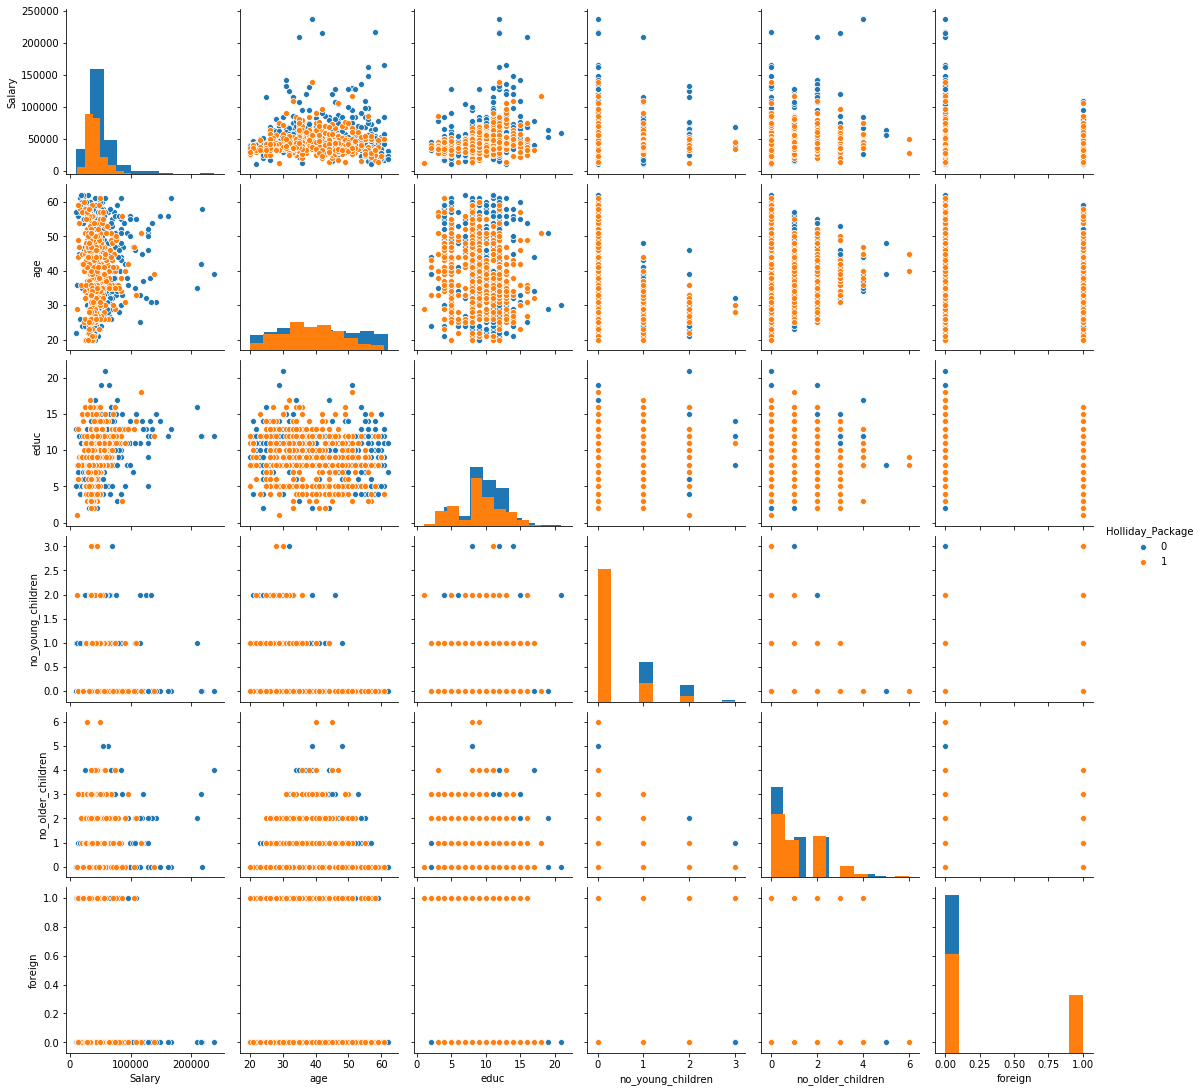

In [26]:
sns.pairplot(df ,diag_kind='hist' ,hue='Holliday_Package');

In [27]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [28]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['Holliday_Package','foreign'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [29]:
df_train_transformed = encoder.fit_transform(df)
df_train_transformed.head()

,Holliday_Package_0.0,Holliday_Package_1.0,Salary,age,educ,no_young_children,no_older_children,foreign_0.0,foreign_1.0
0,1.0,0.0,48412,30,8,1,1,1.0,0.0
1,0.0,1.0,37207,45,8,0,1,1.0,0.0
2,1.0,0.0,58022,46,9,0,0,1.0,0.0
3,1.0,0.0,66503,31,11,2,0,1.0,0.0
4,1.0,0.0,66734,44,12,0,2,1.0,0.0


In [114]:
df4= df.loc[ (df['no_older_children'] > 0)]
df4


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
4,0,66734,44,12,0,2,0
5,1,61590,42,12,0,1,0
7,1,35987,32,8,0,2,0
...,...,...,...,...,...,...,...
862,0,66900,35,10,1,1,1
863,0,35290,51,9,0,1,1
865,1,44057,35,9,0,2,1
867,0,40030,24,4,2,1,1


In [113]:
df3= df.loc[(df['no_young_children'] > 0) ]
df3

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
3,0,66503,31,11,2,0,0
12,0,75327,33,11,2,0,0
23,0,35682,20,12,1,0,0
26,0,37821,28,9,2,0,0
...,...,...,...,...,...,...,...
860,1,37380,34,9,1,1,1
862,0,66900,35,10,1,1,1
864,0,25527,41,5,1,0,1
867,0,40030,24,4,2,1,1


In [30]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [31]:
df_train_transformed.isnull().values.any()

False

Text(0, 0.5, 'foreign')

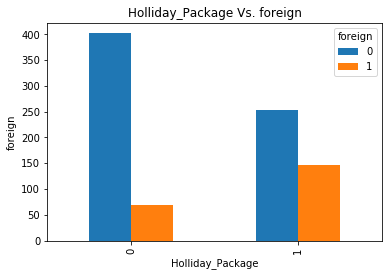

In [32]:
pd.crosstab(df.Holliday_Package,df.foreign).plot(kind='bar')
plt.title('Holliday_Package Vs. foreign')
plt.xlabel('Holliday_Package')
plt.ylabel('foreign')

In [34]:
skewValue = df_train_transformed.skew(axis=0)
print("Skew:")

print(skewValue)


Skew:
Holliday_Package_0.0   -0.163858
Holliday_Package_1.0    0.163858
Salary                  3.124717
age                     0.147701
educ                   -0.043279
no_young_children       1.944667
no_older_children       0.952482
foreign_0.0            -1.169138
foreign_1.0             1.169138
dtype: float64


In [35]:
df_train_transformed.dtypes


Holliday_Package_0.0    float64
Holliday_Package_1.0    float64
Salary                    int64
age                       int64
educ                      int64
no_young_children         int64
no_older_children         int64
foreign_0.0             float64
foreign_1.0             float64
dtype: object

In [36]:
df['Holliday_Package'].value_counts()

0    471
1    400
Name: Holliday_Package, dtype: int64

In [37]:
print ('The percentage of zeroes in the Target variable is',(df['Holliday_Package'].value_counts(1)[0])*100,
        'and the percentage of ones in the Target variable is',round((df['Holliday_Package'].value_counts(1)[1])*100,5))

The percentage of zeroes in the Target variable is 54.07577497129736 and the percentage of ones in the Target variable is 45.92423


In [38]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [39]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df['Holliday_Package']

In [40]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

In [41]:

# Fit the model on original data i.e. before upsampling
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, train_labels)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting on Training and Test dataset

In [42]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [43]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.760577,0.239423
1,0.405080,0.594920
2,0.472207,0.527793
3,0.510851,0.489149
4,0.502411,0.497589


In [44]:
# Accuracy - Training Data
model.score(X_train, train_labels)

0.5878489326765188

AUC: 0.625


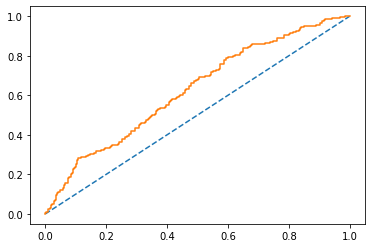

In [45]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

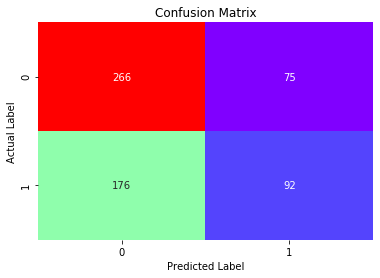

In [46]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68       341
           1       0.55      0.34      0.42       268

    accuracy                           0.59       609
   macro avg       0.58      0.56      0.55       609
weighted avg       0.58      0.59      0.57       609



In [48]:
# Accuracy - Test Data
model.score(X_test, test_labels)

0.5687022900763359

AUC: 0.625


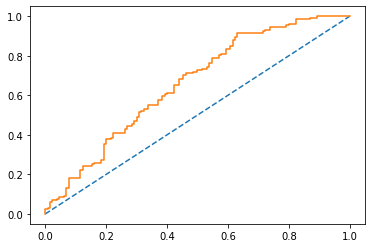

In [49]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

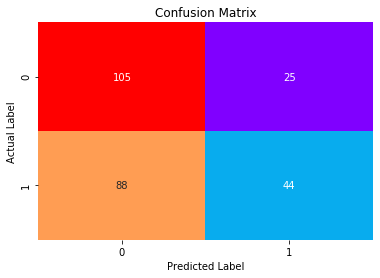

In [50]:
# Get the confusion matrix on the train data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65       130
           1       0.64      0.33      0.44       132

    accuracy                           0.57       262
   macro avg       0.59      0.57      0.54       262
weighted avg       0.59      0.57      0.54       262



In [95]:
print (f'Test Accuracy - : {model.score(X_test,test_labels):.3f}')

Test Accuracy - : 0.504


In [52]:
print (f'Train Accuracy - : {model.score(X_train,train_labels):.3f}')
print (f'Test Accuracy - : {model.score(X_test,test_labels):.3f}')

Train Accuracy - : 0.588
Test Accuracy - : 0.569


In [53]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
     'tol':[0.0001,0.001]
    }
]

In [54]:
from sklearn.model_selection import GridSearchCV
grid_search =GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [55]:
grid_search.fit(X_train, train_labels)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 2800 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 5600 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 9200 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            

In [56]:
grid_search.best_params_

{'C': 0.615848211066026,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.0001}

In [57]:
grid_search.score(X_test,test_labels)

0.6297709923664122

In [58]:
best_grid = grid_search.best_estimator_

In [59]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

AUC: 0.721


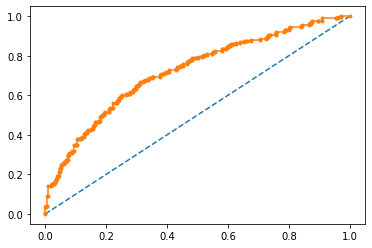

In [61]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [62]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       341
           1       0.68      0.43      0.53       268

    accuracy                           0.66       609
   macro avg       0.67      0.64      0.63       609
weighted avg       0.66      0.66      0.64       609



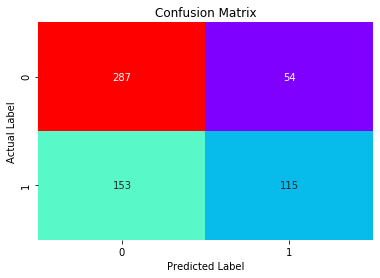

In [63]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.750


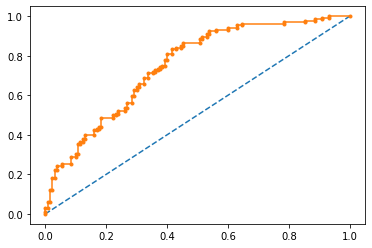

In [64]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

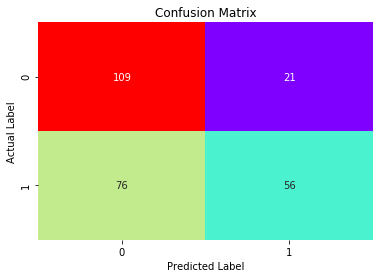

In [65]:
# Get the confusion matrix on the test data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69       130
           1       0.73      0.42      0.54       132

    accuracy                           0.63       262
   macro avg       0.66      0.63      0.61       262
weighted avg       0.66      0.63      0.61       262



In [67]:
print (f'Train Accuracy - : {grid_search.score(X_train,train_labels):.3f}')
print (f'Test Accuracy - : {grid_search.score(X_test,test_labels):.3f}')

Train Accuracy - : 0.660
Test Accuracy - : 0.630


# Linear dicriminant Analysis:

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_LDA = LinearDiscriminantAnalysis()

In [68]:
## Copy all the predictor variables into X dataframe
X_LDA = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y_LDA = df['Holliday_Package']

In [79]:
X_train_LDA, X_test_LDA, Y_train_LDA, Y_test_LDA = train_test_split(X_LDA, y_LDA, test_size=.30, random_state=1)

In [82]:
model1=clf_LDA.fit(X_train_LDA,Y_train_LDA)
model1


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [84]:
# Predict it
ytest_predict_LDA = model1.predict(X_test_LDA)
ytrain_predict_LDA = model1.predict(X_train_LDA)


In [102]:
print (f'Accuracy - : {model1.score(X,y):.3f}')

Accuracy - : 0.662


In [87]:
print(classification_report(Y_train_LDA,ytrain_predict_LDA))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       330
           1       0.68      0.52      0.59       279

    accuracy                           0.67       609
   macro avg       0.67      0.66      0.66       609
weighted avg       0.67      0.67      0.66       609



In [88]:
print(classification_report(Y_test_LDA,ytest_predict_LDA))

              precision    recall  f1-score   support

           0       0.66      0.72      0.68       141
           1       0.63      0.56      0.59       121

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



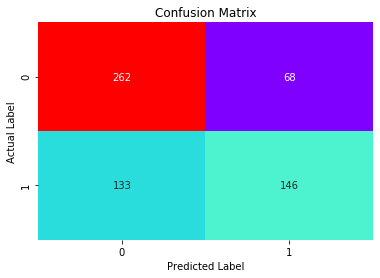

In [92]:
# Get the confusion matrix on the test data
confusion_matrix(Y_train_LDA,ytrain_predict_LDA)
sns.heatmap(confusion_matrix(Y_train_LDA,ytrain_predict_LDA),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

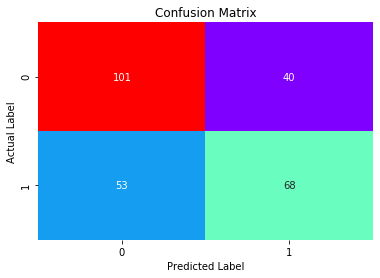

In [91]:
# Get the confusion matrix on the test data
confusion_matrix(Y_test_LDA,ytest_predict_LDA)
sns.heatmap(confusion_matrix(Y_test_LDA,ytest_predict_LDA),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.705


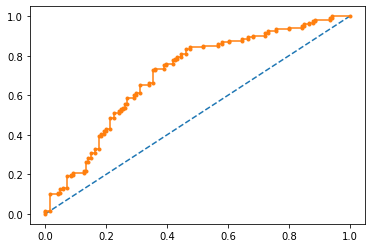

In [98]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test_LDA, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.737


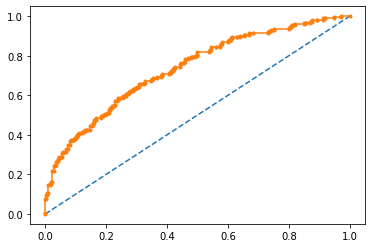

In [99]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train_LDA, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [103]:
model = LinearDiscriminantAnalysis()
model.fit(X_LDA, y_LDA)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [105]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X_LDA, y_LDA, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   



0.6601358411703238


## Using Scaled Data :

In [ ]:
X_scaledtrain=scale(X_train)

In [ ]:
model2=clf.fit(X_scaledtrain,Y_train)
model2

In [ ]:
# Predict it
pred_class2 = model2.predict(scale(X_test))

In [ ]:
print(classification_report(Y_test, pred_class2))

Accuracy - : 0.662
